# 多层感知机
本篇开始介绍多层感知机，首先回忆一下之前介绍的线性回归和softmax回归模型（逻辑回归只是特殊的softmax回归）：
+ 线性回归：输入经过一个线性变换直接得到输出
+ softmax回归：输入经过一个线性变换，再经过一个sigmod函数得到输出

我们进一步思考，假设输入到输出之间不止有一次线性变换会怎么样？我们以逻辑回归为例：
+ softmax回归：输入经过一个线性变换得到一个向量，再经过一个线性变换得到一个向量，......，再经过一个sigmod函数得到输出

其实如果只是这样简单的增加多层线性变换，通过数学推导可以得知相当于一层线性变换，只是对应的参数变多而已。所以我们的关键是在与线性变换之后需要增加一点非线性变换，那么就需要一种变换将输出变一下，这种变换就是激活函数，这样就变成了：    
+ softmax回归：输入经过一个线性变换+激活函数得到一个向量，再经过一个线性变换+激活函数得到一个向量，......，再经过一个sigmod函数得到输出

总结来说，前面介绍的线性回归和softmax回归模型都是经典的机器学习模型，它们从输入到输出中间只有一层变换。从本篇开始正式进入深度学习的领域，开始介绍多层感知机，深度体现在输入到输出直接会有多层变换。多层感知机特殊之处在于中间的变换都是全连接变换。
经过上面分析，下面给出多层感知机的模型构成：

## 1. 模型构成
+ 数据：和线性回归、softmax回归模型一样
+ 模型：最后一层和线性回归、softmax回归模型是一样的，只不过首层会经过多次全连接层+激活函数得到中间层，一直到倒数第一层
+ 参数：和线性回归、softmax回归模型一样
+ 损失函数：和线性回归、softmax回归模型一样
+ 优化方法：梯度下降等，得益于 PyTorch 自动求梯度，我们不再需要显示求出损失函数的导数

下面重点认识一下激活函数。

## 2. 激活函数
常用的激活函数主要有：sigmoid、relu、tanh，下面我们用代码分别绘制它们的曲线和函数导数曲线。

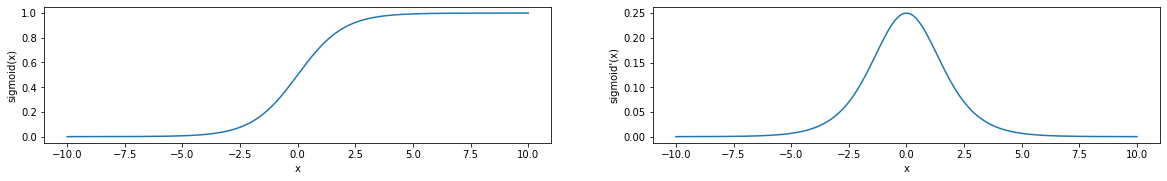

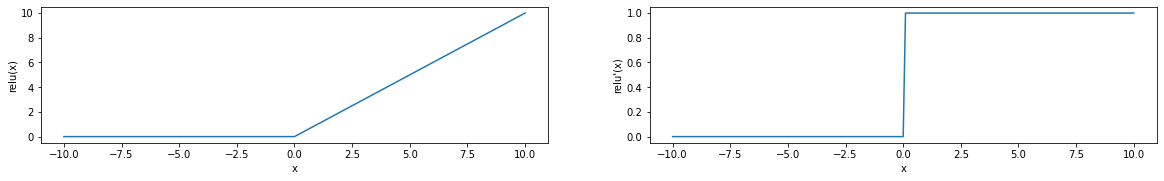

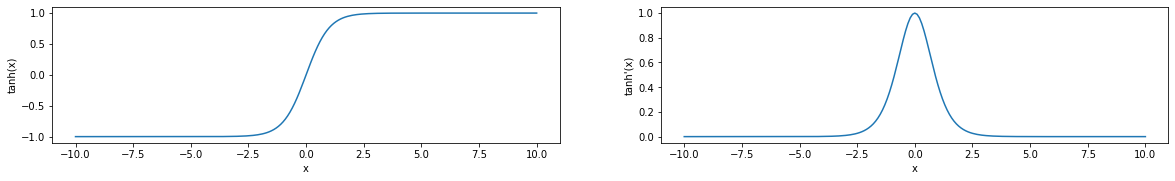

In [17]:
import matplotlib.pyplot as plt
import torch

def plot_x_y(x, y, name):
    _, figs = plt.subplots(1, 2, figsize=(20, 2.5))
    figs[0].plot(x.detach().numpy(), y.detach().numpy())
    figs[0].set_xlabel('x')
    figs[0].set_ylabel(name + '(x)')
    y.sum().backward()
    figs[1].plot(x.detach().numpy(), x.grad.detach().numpy())
    figs[1].set_xlabel('x')
    figs[1].set_ylabel(name + '\'(x)')
    plt.show()

x = torch.range(-10, 10, 0.1, requires_grad=True)
y = torch.sigmoid(x)
plot_x_y(x, y, 'sigmoid')
x.grad.zero_()
y = torch.relu(x)
plot_x_y(x, y, 'relu')
x.grad.zero_()
y = torch.tanh(x)
plot_x_y(x, y, 'tanh')